### Data checks
- get data from https://www.idescat.cat/indicadors/?id=anuals&n=10753&lang=en&col=1
- calcuate yearly aggregations of our dataset
- comparing:
    - Deaths within 24 hours = Fatalties (our dataset)
    - Seriously injured	= Serious Injuries (our dataset)
- Conclusion: in our dataset we have not all accidents but those with serious injuries or fatalities

In [1]:
# yearly sum from our data
df = pd.read_csv('data/Traffic_Accidents.csv', encoding = 'utf8')
cols = df.columns
df.columns = [c.strip() for c in cols]

df['Accidents Num'] = 1
df['Date'] = pd.to_datetime(df['Date'])
df['dt_month'] = pd.to_datetime(df.Date.astype(str).str[:7])

feats_vals = '''
Accidents Num
Total Victims
Serious Injuries 
Fatalties
'''
feats_vals = [f.strip() for f in feats_vals.split('\n') if f.strip() != '']

feats1 = ['Year']
df2 = df.groupby(feats1)[feats_vals].sum().reset_index()

In [18]:
# official data
pd.options.display.float_format = '{:,.0f}'.format
df1 = pd.read_html('https://www.idescat.cat/indicadors/?id=anuals&n=10753&lang=en&col=1')[0].rename(columns = {'Unnamed: 0': 'Year'})[:-2].astype(float)
df1['Year'] = df1['Year'].astype(int)
df3 = df1.merge(df2, how = 'left').set_index('Year')
df3.to_pickle('data/df_stat.pkl')
df3

,Accidents,Urban roads,Interurban roads,Victims,Injured,Seriously injured,Slightly injured,Deaths within 24 hours,Deaths within 30 days,Accidents Num,Total Victims,Serious Injuries,Fatalties
Year,,,,,,,,,,,,,
2022,"23,061","15,509","7,552","29,698","29,470","1,564","27,906",228,264,NaN,NaN,NaN,NaN
2021,"21,895","14,937","6,958","28,130","27,938","1,432","26,506",192,241,"1,447","2,164","1,432",192
2020,"17,779","12,397","5,382","22,734","22,575","1,175","21,400",159,204,"1,208","1,702","1,175",159
2019,"26,576","18,157","8,419","34,986","34,744","1,689","33,055",242,304,"1,732","2,576","1,689",242
2018,"26,907","18,052","8,855","35,752","35,492","1,736","33,756",260,326,"1,745","2,665","1,736",260
2017,"27,052","18,097","8,955","36,167","35,927","1,711","34,216",240,283,"1,719","2,634","1,711",240
2016,"26,996","18,220","8,769","36,285","36,044","1,839","34,215",231,282,"1,793","2,785","1,839",231
2015,"25,286","17,279","8,007","33,964","33,703","1,900","31,803",261,291,"1,901","2,899","1,900",261
2014,"23,828","16,305","7,523","32,317","32,087","1,888","30,199",230,272,"1,912","2,878","1,888",230


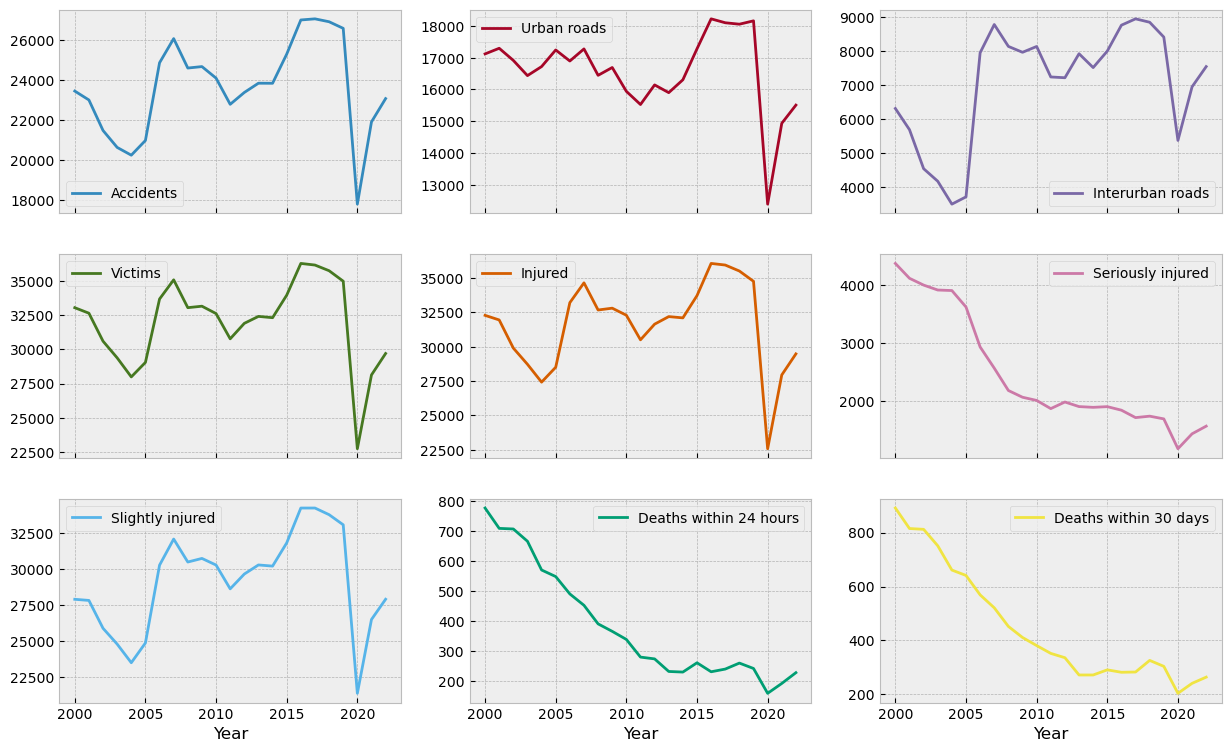

In [3]:
_ = df1.set_index('Year').plot(subplots = True, figsize = (15,9), layout = (3,3))

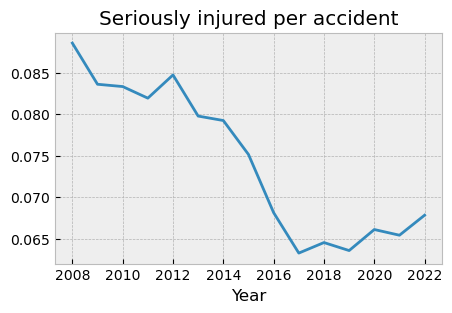

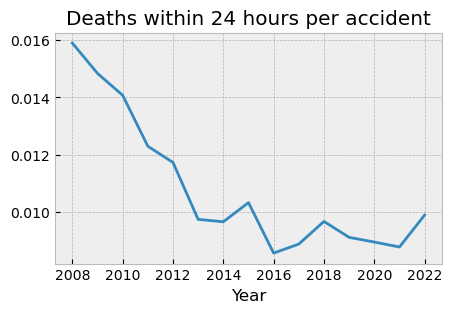

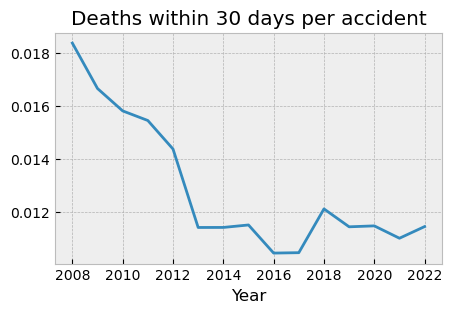

In [19]:
x = df3['Seriously injured'] / df3['Accidents']
_ = x[:15, ].plot(figsize = (5,3), title = 'Seriously injured per accident')
plt.show()

x = df3['Deaths within 24 hours'] / df3['Accidents']
_ = x[:15, ].plot(figsize = (5,3), title = 'Deaths within 24 hours per accident')
plt.show()

x = df3['Deaths within 30 days'] / df3['Accidents']
_ = x[:15, ].plot(figsize = (5,3), title = 'Deaths within 30 days per accident')
plt.show()